In [1]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile

zip_path = '/content/drive/MyDrive/ADNI/PD T2/k-means_3.zip'
extract_path = '/content/data'  # Spécifiez le chemin où vous voulez extraire les fichiers

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/drive


In [ ]:
!rm -r /content/data1

In [ ]:
!mkdir /content/data1
!mkdir /content/data1/AD
!mkdir /content/data1/CN
!mkdir /content/data1/MCI

In [2]:
import os
import nibabel as nib

def check_voxel_dimensions(input_dir):
    files_without_third_dimension = []

    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.nii.gz'):
                file_path = os.path.join(root, file)
                try:
                    img = nib.load(file_path)
                    image_data = img.get_fdata()
                    if len(image_data.shape) < 3:
                        files_without_third_dimension.append(file_path)
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier {file_path}: {e}")

    return files_without_third_dimension

input_dir = '/content/data'  # Remplacez par le chemin vers votre dossier data
files_without_third_dimension = check_voxel_dimensions(input_dir)

if files_without_third_dimension:
    print("Les fichiers suivants n'ont pas de troisième dimension :")
    for file in files_without_third_dimension:
        print(file)
else:
    print("Tous les fichiers ont une troisième dimension.")

Les fichiers suivants n'ont pas de troisième dimension :
/content/data/AD/I76801.nii.gz
/content/data/AD/I109774.nii.gz
/content/data/AD/I39504.nii.gz
/content/data/AD/I30778.nii.gz
/content/data/AD/I30010.nii.gz
/content/data/AD/I45792.nii.gz
/content/data/CN/I135612.nii.gz
/content/data/CN/I302422.nii.gz
/content/data/CN/I42621.nii.gz
/content/data/CN/I191342.nii.gz
/content/data/CN/I158103.nii.gz
/content/data/CN/I15950.nii.gz
/content/data/MCI/I207816.nii.gz
/content/data/MCI/I154174.nii.gz
/content/data/MCI/I108734.nii.gz
/content/data/MCI/I235137.nii.gz
/content/data/MCI/I145520.nii.gz
/content/data/MCI/I103861.nii.gz
/content/data/MCI/I267643.nii.gz
/content/data/MCI/I81794.nii.gz
/content/data/MCI/I104616.nii.gz
/content/data/MCI/I77804.nii.gz
/content/data/MCI/I23504.nii.gz


In [3]:
import os
import nibabel as nib

def check_and_delete_voxels_without_third_dimension(input_dir):
    files_without_third_dimension = []

    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.nii.gz'):
                file_path = os.path.join(root, file)
                try:
                    img = nib.load(file_path)
                    image_data = img.get_fdata()
                    if len(image_data.shape) < 3:
                        files_without_third_dimension.append(file_path)
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier {file_path}: {e}")

    # Supprimer les fichiers sans troisième dimension
    for file_path in files_without_third_dimension:
        try:
            os.remove(file_path)
            print(f"Supprimé: {file_path}")
        except Exception as e:
            print(f"Erreur lors de la suppression du fichier {file_path}: {e}")

input_dir = '/content/data'  # Remplacez par le chemin vers votre dossier data
check_and_delete_voxels_without_third_dimension(input_dir)


Supprimé: /content/data/AD/I76801.nii.gz
Supprimé: /content/data/AD/I109774.nii.gz
Supprimé: /content/data/AD/I39504.nii.gz
Supprimé: /content/data/AD/I30778.nii.gz
Supprimé: /content/data/AD/I30010.nii.gz
Supprimé: /content/data/AD/I45792.nii.gz
Supprimé: /content/data/CN/I135612.nii.gz
Supprimé: /content/data/CN/I302422.nii.gz
Supprimé: /content/data/CN/I42621.nii.gz
Supprimé: /content/data/CN/I191342.nii.gz
Supprimé: /content/data/CN/I158103.nii.gz
Supprimé: /content/data/CN/I15950.nii.gz
Supprimé: /content/data/MCI/I207816.nii.gz
Supprimé: /content/data/MCI/I154174.nii.gz
Supprimé: /content/data/MCI/I108734.nii.gz
Supprimé: /content/data/MCI/I235137.nii.gz
Supprimé: /content/data/MCI/I145520.nii.gz
Supprimé: /content/data/MCI/I103861.nii.gz
Supprimé: /content/data/MCI/I267643.nii.gz
Supprimé: /content/data/MCI/I81794.nii.gz
Supprimé: /content/data/MCI/I104616.nii.gz
Supprimé: /content/data/MCI/I77804.nii.gz
Supprimé: /content/data/MCI/I23504.nii.gz


In [4]:
import os
import nibabel as nib
import numpy as np
import imageio

def create_output_dir(base_dir, sub_dir):
    output_dir = os.path.join(base_dir, sub_dir)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    return output_dir

def save_slices(image_data, output_dir, base_filename):
    num_slices = image_data.shape[2]
    for i in range(num_slices):
        slice_data = image_data[:, :, i]
        # Normaliser la tranche pour qu'elle soit entre 0 et 255
        slice_data_normalized = np.interp(slice_data, (slice_data.min(), slice_data.max()), (0, 255)).astype(np.uint8)
        output_path = os.path.join(output_dir, f"{base_filename}_slice_{i}.png")
        imageio.imwrite(output_path, slice_data_normalized)

def process_voxels(input_dir, output_base_dir):
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.nii.gz'):
                file_path = os.path.join(root, file)
                img = nib.load(file_path)
                image_data = img.get_fdata()
                sub_dir = os.path.basename(root)
                output_dir = create_output_dir(output_base_dir, sub_dir)
                base_filename = os.path.splitext(os.path.splitext(file)[0])[0]
                save_slices(image_data, output_dir, base_filename)

input_dir = '/content/data'  # Remplacez par le chemin vers votre dossier data
output_base_dir = '/content/data1'  # Remplacez par le chemin vers le dossier de sortie

process_voxels(input_dir, output_base_dir)


In [ ]:
import os

def count_png_files(input_dir):
    count_dict = {}

    for root, _, files in os.walk(input_dir):
        sub_dir = os.path.basename(root)
        count = sum(1 for file in files if file.endswith('.png'))
        if sub_dir not in count_dict:
            count_dict[sub_dir] = 0
        count_dict[sub_dir] += count

    return count_dict

input_dir = '/content/data1'  # Remplacez par le chemin vers votre dossier data
png_counts = count_png_files(input_dir)

for sub_dir, count in png_counts.items():
    print(f"Le dossier {sub_dir} contient {count} fichiers .png.")


Le dossier data1 contient 0 fichiers .png.
Le dossier CN contient 5076 fichiers .png.
Le dossier MCI contient 5023 fichiers .png.
Le dossier AD contient 5232 fichiers .png.


### Décapage

In [ ]:
!rm -r /content/data2

In [ ]:
!mkdir /content/data2
!mkdir /content/data2/AD
!mkdir /content/data2/CN
!mkdir /content/data2/MCI

(-0.5, 255.5, 255.5, -0.5)

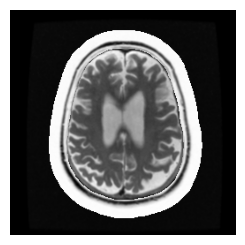

In [9]:
# Afficher le masque
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

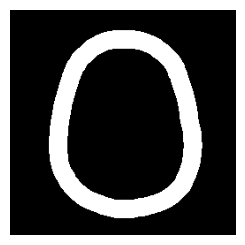

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = '/content/data1/AD/I118315_slice_6.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)



# Appliquer un seuil pour binariser l'image
_, binary_image = cv2.threshold(image, 15, 255, cv2.THRESH_BINARY)

# Inverser l'image binaire
binary_image_inv = cv2.bitwise_not(binary_image)

# Trouver les contours
contours, hierarchy = cv2.findContours(binary_image_inv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur l'image originale
contour_image = np.zeros_like(image)

contours = sorted(contours, key=cv2.contourArea, reverse=True)

cv2.drawContours(contour_image, [contours[1]], -1, (255, 255, 255), 20)

# Afficher le masque
plt.subplot(1, 2, 2)
plt.imshow(contour_image , cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

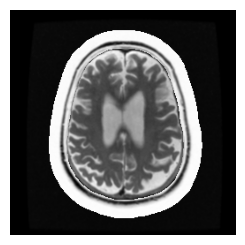

In [7]:
stripped_image = cv2.bitwise_not(image, image, mask=contour_image)

# Afficher le masque
plt.subplot(1, 2, 2)
plt.imshow(stripped_image, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

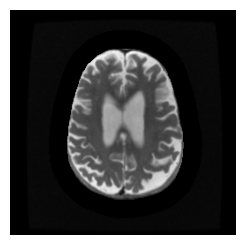

In [8]:
# Créer une image de fond noir
background = np.zeros_like(image)

# Inverser le masque
inverse_mask = cv2.bitwise_not(contour_image)

# Appliquer le masque inversé sur l'image
masked_image = cv2.bitwise_and(image, image, mask=inverse_mask)

# Copier les zones masquées sur l'image de fond noir
result_image = cv2.add(background, masked_image)

# Afficher le resultat
plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.axis('off')



### Décapage Dossier

In [ ]:
import os
import cv2
import numpy as np

def process_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Appliquer un seuil pour binariser l'image
    _, binary_image = cv2.threshold(image, 15, 255, cv2.THRESH_BINARY)

    # Inverser l'image binaire
    binary_image_inv = cv2.bitwise_not(binary_image)

    # Trouver les contours
    contours, _ = cv2.findContours(binary_image_inv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Dessiner les contours sur l'image originale
    contour_image = np.zeros_like(image)

    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    cv2.drawContours(contour_image, [contours[1]], -1, (255, 255, 255), 20)

    stripped_image = cv2.bitwise_not(image, image, mask=contour_image)

    # Créer une image de fond noir
    background = np.zeros_like(image)

    # Inverser le masque
    inverse_mask = cv2.bitwise_not(contour_image)

    # Appliquer le masque inversé sur l'image
    masked_image = cv2.bitwise_and(image, image, mask=inverse_mask)

    # Copier les zones masquées sur l'image de fond noir
    result_image = cv2.add(background, masked_image)

    return result_image

def process_directory(input_dir, output_dir):
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.png'):
                input_path = os.path.join(root, file)
                output_path = os.path.join(output_dir, os.path.relpath(root, input_dir), file)

                # Créer les répertoires de sortie si nécessaire
                os.makedirs(os.path.dirname(output_path), exist_ok=True)

                # Traiter l'image
                result_image = process_image(input_path)

                # Enregistrer l'image résultante
                cv2.imwrite(output_path, result_image)

input_dir = '/content/data1'
output_dir = '/content/data2'

process_directory(input_dir, output_dir)


### contraste

59.970376645216554


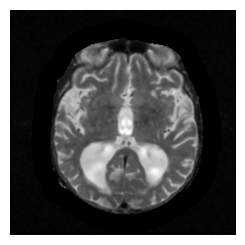

In [ ]:
image_path = '/content/data3/AD/I105979_slice_5.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Appliquer la transformation linéaire pour ajuster le contraste
adjusted_image = cv2.convertScaleAbs(image, alpha=1.5 , beta=0)

# Afficher
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')

contraste = np.std(image)
print(contraste)


In [ ]:
!rm -r /content/data3

In [ ]:
import os
import cv2
import numpy as np

def calculate_contrast(image):
    return np.std(image)

def normalize_contrast(image, target_contrast=60):
    current_contrast = calculate_contrast(image)
    if current_contrast == 0:
        return image  # Eviter la division par zéro
    alpha = target_contrast / current_contrast
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=0)
    return adjusted_image

def process_image(image_path, output_path, target_contrast=60):
    # Lire l'image en niveaux de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Erreur de lecture de l'image: {image_path}")
        return

    # Normaliser le contraste de l'image
    adjusted_image = normalize_contrast(image, target_contrast)

    # Créer le répertoire de sortie s'il n'existe pas
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Enregistrer l'image résultante
    cv2.imwrite(output_path, adjusted_image)

def process_images(input_dir, output_dir, target_contrast=60):
    # Parcourir tous les sous-dossiers et fichiers
    for subdir, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.png'):
                input_path = os.path.join(subdir, file)
                # Générer le chemin de sortie correspondant dans le dossier de sortie
                relative_path = os.path.relpath(input_path, input_dir)
                output_path = os.path.join(output_dir, relative_path)

                # Traiter l'image
                process_image(input_path, output_path, target_contrast)

input_dir = '/content/data2'
output_dir = '/content/data3'
target_contrast = 60  # Contraste cible

process_images(input_dir, output_dir, target_contrast)


###Ségmention

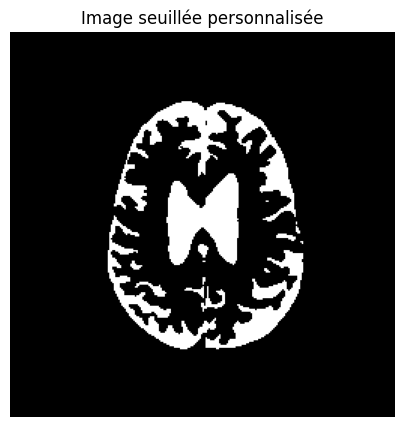

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Charger l'image PNG en niveaux de gris
image = cv2.imread('/content/data3/AD/I118315_slice_6.png', cv2.IMREAD_GRAYSCALE)

# Seuillage personnalisé
threshold_value = 130
I2 = np.zeros_like(image)
rows, cols = I2.shape

for i in range(rows):
    for j in range(cols):
        if image[i, j] <= threshold_value:
            I2[i, j] = 0
        else:
            I2[i, j] = 1

# Afficher l'image seuillée
plt.figure(figsize=(5, 5))
plt.imshow(I2, cmap='gray')
plt.title('Image seuillée personnalisée')
plt.axis('off')
plt.show()

### Ségementation dossier

In [ ]:
!rm -r /content/data4

In [ ]:
import cv2
import numpy as np
import os

# Dossiers de départ et de destination
input_dir = '/content/data3'
output_dir = '/content/data4'

# Sous-dossiers
categories = ['AD', 'MCI', 'CN']

# Valeur de seuillage
threshold_value = 130

# Fonction pour appliquer le seuillage personnalisé
def apply_threshold(image_path, threshold_value):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    I2 = np.zeros_like(image)
    rows, cols = I2.shape

    for i in range(rows):
        for j in range(cols):
            if image[i, j] <= threshold_value:
                I2[i, j] = 0
            else:
                I2[i, j] = 255

    return I2

# Créer les dossiers de destination s'ils n'existent pas
os.makedirs(output_dir, exist_ok=True)
for category in categories:
    os.makedirs(os.path.join(output_dir, category), exist_ok=True)

# Parcourir chaque catégorie
for category in categories:
    input_category_dir = os.path.join(input_dir, category)
    output_category_dir = os.path.join(output_dir, category)

    for filename in os.listdir(input_category_dir):
        if filename.endswith('.png'):
            input_image_path = os.path.join(input_category_dir, filename)
            output_image_path = os.path.join(output_category_dir, filename)

            # Appliquer le seuillage
            result_image = apply_threshold(input_image_path, threshold_value)
            if result_image is not None:
                # Enregistrer l'image résultante
                cv2.imwrite(output_image_path, result_image)


In [ ]:
from google.colab import drive
import shutil
import os
# Chemin du dossier à compresser
folder_to_zip = '/content/data1'

# Chemin où le fichier ZIP sera sauvegardé
zip_output_path = '/content/kmeans_nonseg.zip'

# Créer le fichier ZIP
shutil.make_archive('/content/kmeans_nonseg', 'zip', folder_to_zip)


drive_output_path = '/content/drive/MyDrive/ADNI/PD T2/kmeans_nonseg.zip'

shutil.move(zip_output_path, drive_output_path)

'/content/drive/MyDrive/ADNI/PD T2/kmeans_nonseg.zip'

In [ ]:
from google.colab import drive
import shutil
import os
# Chemin du dossier à compresser
folder_to_zip = '/content/data2'

# Chemin où le fichier ZIP sera sauvegardé
zip_output_path = '/content/data2.zip'

# Créer le fichier ZIP
shutil.make_archive('/content/data2', 'zip', folder_to_zip)


drive_output_path = '/content/drive/MyDrive/ADNI/PD T2/data2.zip'

shutil.move(zip_output_path, drive_output_path)

'/content/drive/MyDrive/ADNI/PD T2/data2.zip'

In [ ]:
from google.colab import drive
import shutil
import os
# Chemin du dossier à compresser
folder_to_zip = '/content/data4'

# Chemin où le fichier ZIP sera sauvegardé
zip_output_path = '/content/datafinal.zip'

# Créer le fichier ZIP
shutil.make_archive('/content/datafinal', 'zip', folder_to_zip)


drive_output_path = '/content/drive/MyDrive/ADNI/PD T2/datafinal.zip'

shutil.move(zip_output_path, drive_output_path)

'/content/drive/MyDrive/ADNI/PD T2/datafinal.zip'

In [ ]:
import os

# Chemin vers votre fichier PNG sur Google Colab
chemin_fichier = '/content/data4/CN/I10031_slice_0.png'

# Vérifier si le fichier existe
if os.path.exists(chemin_fichier):
    # Obtenir la taille du fichier en octets
    taille_octets = os.path.getsize(chemin_fichier)

    # Convertir en mégaoctets
    taille_mo = taille_octets / (1024 * 1024)

    print(f"La taille du fichier {chemin_fichier} est de {taille_mo:.5f} Mo.")
else:
    print(f"Le fichier {chemin_fichier} n'existe pas.")


La taille du fichier /content/data4/CN/I10031_slice_0.png est de 0.00262 Mo.


In [ ]:
import os

# Chemin vers votre dossier contenant les sous-dossiers AD, MCI, CN
chemin_data4 = '/content/data4'

# Vérifier si le dossier data4 existe
if os.path.exists(chemin_data4):
    # Parcourir les sous-dossiers AD, MCI, CN
    for sous_dossier in ['AD', 'MCI', 'CN']:
        chemin_sous_dossier = os.path.join(chemin_data4, sous_dossier)
        # Vérifier si le sous-dossier existe
        if os.path.exists(chemin_sous_dossier):
            # Compter le nombre de fichiers (images) dans le sous-dossier
            nb_images = len(os.listdir(chemin_sous_dossier))
            print(f"Le sous-dossier {sous_dossier} contient {nb_images} images.")
        else:
            print(f"Le sous-dossier {sous_dossier} n'existe pas.")
else:
    print(f"Le dossier {chemin_data4} n'existe pas.")


Le sous-dossier AD contient 5232 images.
Le sous-dossier MCI contient 5023 images.
Le sous-dossier CN contient 5076 images.
